# Data cleaning

In [56]:
import json
import pandas as pd
import time
import numpy as np

In [42]:
d1 = "data/ognisko_label_2.bmerawdata"
d2 = "data/powietrze_label_1.bmerawdata"
d1_temp = json.load(open(d1))
d2_temp = json.load(open(d2))

In [44]:
data = pd.DataFrame(d1_temp["rawDataBody"]["dataBlock"])
data.columns = [item['key'] for item in d1_temp["rawDataBody"]["dataColumns"]]
data["date"] = pd.to_datetime(data['real_time_clock'],unit='s')

data2 = pd.DataFrame(d2_temp["rawDataBody"]["dataBlock"])
data2.columns = [item['key'] for item in d2_temp["rawDataBody"]["dataColumns"]]
data2["date"] = pd.to_datetime(data2['real_time_clock'],unit='s')

data = pd.concat([data, data2])

In [45]:
d

{'configHeader': {'dateCreated': '2022-12-02T21:16:24.115Z',
  'appVersion': '1.7.1',
  'boardType': 'board_8',
  'boardMode': 'burn_in',
  'boardLayout': 'grouped'},
 'configBody': {'heaterProfiles': [{'id': 'heater_354',
    'timeBase': 140,
    'temperatureTimeVectors': [[320, 5],
     [100, 2],
     [100, 10],
     [100, 30],
     [200, 5],
     [200, 5],
     [200, 5],
     [320, 5],
     [320, 5],
     [320, 5]]}],
  'dutyCycleProfiles': [{'id': 'duty_5_10',
    'numberScanningCycles': 5,
    'numberSleepingCycles': 10}],
  'sensorConfigurations': [{'sensorIndex': 0,
    'heaterProfile': 'heater_354',
    'dutyCycleProfile': 'duty_5_10'},
   {'sensorIndex': 1,
    'heaterProfile': 'heater_354',
    'dutyCycleProfile': 'duty_5_10'},
   {'sensorIndex': 2,
    'heaterProfile': 'heater_354',
    'dutyCycleProfile': 'duty_5_10'},
   {'sensorIndex': 3,
    'heaterProfile': 'heater_354',
    'dutyCycleProfile': 'duty_5_10'},
   {'sensorIndex': 4,
    'heaterProfile': 'heater_354',
    '

In [46]:
df = data.describe().drop(columns=["sensor_index", "sensor_id","timestamp_since_poweron", "real_time_clock",
                             "scanning_enabled", "error_code","heater_profile_step_index"  ])

In [48]:
print(df.to_latex(escape=True))

\begin{tabular}{lrrrrr}
\toprule
{} &  temperature &     pressure &  relative\_humidity &  resistance\_gassensor &    label\_tag \\
\midrule
count &  9730.000000 &  9730.000000 &        9730.000000 &          9.730000e+03 &  9730.000000 \\
mean  &    29.186705 &  1009.370865 &          33.639845 &          5.946744e+06 &     1.496608 \\
std   &    13.684444 &     0.194422 &          17.632382 &          1.486022e+07 &     0.500014 \\
min   &    11.397330 &  1008.931763 &           6.677685 &          1.079258e+04 &     1.000000 \\
25\%   &    17.518165 &  1009.215515 &          17.579583 &          1.363879e+05 &     1.000000 \\
50\%   &    20.948670 &  1009.361023 &          37.321152 &          3.467660e+05 &     1.000000 \\
75\%   &    38.575382 &  1009.500610 &          49.289893 &          1.744185e+06 &     2.000000 \\
max   &    64.141205 &  1009.969116 &          69.909927 &          1.024000e+08 &     2.000000 \\
\bottomrule
\end{tabular}



C:\Users\kubix\AppData\Local\Temp\ipykernel_21440\3205930062.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(escape=True))


In [49]:
df

,temperature,pressure,relative_humidity,resistance_gassensor,label_tag
count,9730.000000,9730.000000,9730.000000,9.730000e+03,9730.000000
mean,29.186705,1009.370865,33.639845,5.946744e+06,1.496608
std,13.684444,0.194422,17.632382,1.486022e+07,0.500014
min,11.397330,1008.931763,6.677685,1.079258e+04,1.000000
25%,17.518165,1009.215515,17.579583,1.363879e+05,1.000000
50%,20.948670,1009.361023,37.321152,3.467660e+05,1.000000
75%,38.575382,1009.500610,49.289893,1.744185e+06,2.000000
max,64.141205,1009.969116,69.909927,1.024000e+08,2.000000


In [32]:
# fixing messed up labels, more details ask Kuba or Hania
# not needed anymore 
# fire = 2
# air = 1

""" data["fixed_label"] = 0
x = data.label_tag.to_list()
for i in range(1,len(x),1):
    if x[i-1] != x[i]:
        print(i)
data.loc[:4777, "fixed_label"] = 1
data.loc[4777:9200, "fixed_label"] = 2
data.loc[9200:13733, "fixed_label"] = 1
data.loc[13733:, "fixed_label"] = 2 """

' data["fixed_label"] = 0\nx = data.label_tag.to_list()\nfor i in range(1,len(x),1):\n    if x[i-1] != x[i]:\n        print(i)\ndata.loc[:4777, "fixed_label"] = 1\ndata.loc[4777:9200, "fixed_label"] = 2\ndata.loc[9200:13733, "fixed_label"] = 1\ndata.loc[13733:, "fixed_label"] = 2 '

In [50]:
df = data[data.sensor_index == 1]
X = data[["temperature", "pressure", "relative_humidity"]]#, "resistance_gassensor"]]#, "heater_profile_step_index"]]
y = data["label_tag"]

In [51]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
clf = MLPClassifier(hidden_layer_sizes=(32,32,32), activation='logistic',
                    random_state=100, max_iter=200).fit(X_train, y_train)

clf.score(X_test, y_test)

0.998766954377312

[[1238    0]
 [   3 1192]]


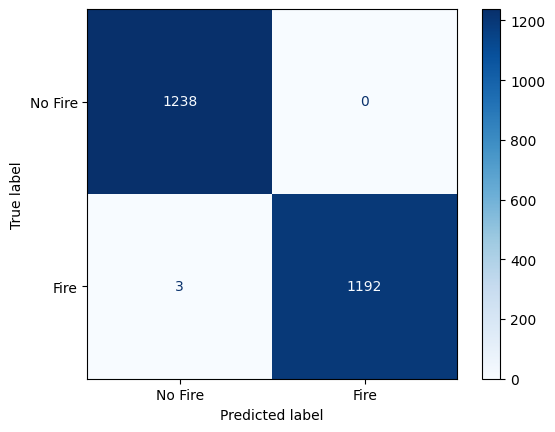

In [58]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_pred = clf.predict(X_test)

#for title, normalize in titles_options:
disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
    display_labels=["No Fire", "Fire"],
    cmap=plt.cm.Blues,
 #   normalize=normalize,
    )
    #disp.ax_.set_title(title)

#print(title)
print(disp.confusion_matrix)

plt.show()


In [59]:
np.unique(y_pred, return_counts=True)

(array([1, 2], dtype=int64), array([1241, 1192], dtype=int64))

In [60]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.998766954377312
0.9987898346107301
0.9975825946817083
1.0


# Zapisywanie i wczytywanie modelu

In [61]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.998766954377312
